#Análisis y Visualización de datos
# Entregable #1
# ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

## Lectura del Dataset

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import re
import requests


In [2]:
seaborn.set_context('talk')
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
dataset_metadata = {
  'year': 2019,
  'part': 2,
  'skiprows': 0,
  'publish_date': '2019-08-15',
  'minimum_salary': 12500, # https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina
}
df = pd.read_csv(url)
raw_dataframe = None
source = requests.get(url.format(dataset_metadata['year'], dataset_metadata['part'])).content
raw_dataframe = pd.read_csv(io.StringIO(source.decode('utf-8')), skiprows=dataset_metadata['skiprows'], thousands='.', decimal=',')

In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN


In [4]:
df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [5]:
raw_dataframe['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count                 5883.00
mean        23131549531284.33
std        913815527415422.12
min                     10.00
25%                 520000.00
50%                 781930.00
75%                1080000.00
max      50779000000000000.00
Name: salary_monthly_NETO, dtype: object

Trabajo más sobre el raw_dataframe, como eleiminando los valores muy altos. Pero la media y std dan muy feos. 

In [6]:
raw_dataframe=raw_dataframe[raw_dataframe['salary_monthly_NETO']<3000000]
raw_dataframe['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5647.00
mean      823001.01
std       468018.41
min           10.00
25%       500160.00
50%       758000.00
75%      1030000.00
max      2980000.00
Name: salary_monthly_NETO, dtype: object

In [7]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [8]:
df['work_role']=='Developer'

0       False
1        True
2       False
3       False
4        True
        ...  
6090     True
6091    False
6092    False
6093    False
6094    False
Name: work_role, Length: 6095, dtype: bool

## Selección de columnas relevantes para analizar

In [9]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_role']

## Preparación de datos: todo lo necesario para facilitar la manipulación de datos y estudio de variables.

In [10]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Infosec,[ninguno]


## Seleccionar las filas relevantes para analizar. 
Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
* Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
* Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

### Análisis de sub-población

* Seleccionaría de la columna word_role solo desarrolladores ya que consideramos que es la subpobablación cuyo salarío tiene relación directa con su expertise en programación.



In [11]:
df_lang['work_role'].unique() ##Buscaria todo lo que diga developer y desarrollador

array(['Consultant', 'Developer', 'Infosec', 'SysAdmin / DevOps / SRE',
       'Manager / Director', 'Technical Leader',
       'Data Scientist / Data Engineer', 'DBA', 'Project Manager',
       'Business Analyst', 'QA / Tester', 'Architect', 'Product Manager',
       'Designer', 'BI Analyst / Data Analyst', 'Middleware',
       'VP / C-Level', 'Storage / Backup', 'Networking', 'HelpDesk', 'UX',
       'Ux User Research Analyst', 'Jefe de infraestructura ',
       'Scrum Master', 'Sales / Pre-Sales', 'Team leader',
       'Microinformatica', 'Technical Writer',
       'Implementadora de software ', 'Desarrollador BI',
       'Martech Specialist', 'Software Configuration Management',
       'Maquetador/Diseño UI', 'Service manager', 'Release Manager',
       'Access Management Analyst', 'DevOps Cloud Engineer',
       'Soporte e Infraestructura', 'Recruiter / HR', 'tecnico',
       'Finance', 'Data Visualization', 'Implementador de Software',
       'back end', 'Software Engineer', 'NLP

In [12]:
df_lang['work_role_clean'] = df_lang['work_role'].apply(lambda x: str.lower(x))

In [13]:
df_lang.head(3)

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
0,ninguno,Ninguno,43000.0,Consultant,[ninguno],consultant
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer


In [14]:
df_developer_fin =df_lang[df_lang['work_role_clean'].str.contains("developer|desarrollador")]

In [15]:
df_developer_fin.count()

programming_language           8879
tools_programming_languages    8879
salary_monthly_NETO            8573
work_role                      8879
cured_programming_languages    8879
work_role_clean                8879
dtype: int64

In [16]:
df_developer_fin.head(3)

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer


In [17]:
df_developer_fin['work_role_clean'].unique()

array(['developer', 'desarrollador bi',
       'trabajo como desarrollador back, pero también tengo que estar haciendo de analista , dba, dev frontend y a veces de helpdesk',
       'help desk/software architect/developer', 'full developer',
       'full stack developer y growth hacker',
       'developer qa - ambos roles', 'firmware developer',
       'software developer- computer vision full stack',
       'senior software developer',
       'founder/ceo/developer/designer/product manager... todo',
       'game developer', 'analista/desarrollador',
       'desarrollador  / líder técnico / analista técnico funcional'],
      dtype=object)

In [18]:
df_developer_fin['work_role_clean'].value_counts()

developer                                                                                                                       8809
full stack developer y growth hacker                                                                                              18
firmware developer                                                                                                                10
desarrollador  / líder técnico / analista técnico funcional                                                                        6
analista/desarrollador                                                                                                             6
trabajo como desarrollador back, pero también tengo que estar haciendo de analista , dba, dev frontend y a veces de helpdesk       6
founder/ceo/developer/designer/product manager... todo                                                                             5
software developer- computer vision full stack                       

In [19]:
df_lang_work=df_developer_fin
language_count = df_lang_work.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
most_important_lang=language_count[:10]
most_important_lang

,language,frequency
0,javascript,1593
1,html,1096
2,sql,999
3,css,834
4,java,773
5,typescript,567
6,.net,470
7,c#,450
8,php,416
9,python,391


In [20]:
selection = most_important_lang['language'].to_list()

In [21]:
selection

['javascript',
 'html',
 'sql',
 'css',
 'java',
 'typescript',
 '.net',
 'c#',
 'php',
 'python']

In [22]:
mask = df_lang_work['programming_language'].apply(lambda x: any(item for item in selection if item in x))
df1 = df_lang_work[mask]

Agregamos los lenguajes mas demandados en el mercado https://octoverse.github.com/#chart-rely-on-oss

In [23]:
mas_demandados= ['php','java','javascript','.net','python','ruby']

In [24]:
mask_2 = df_lang_work['programming_language'].apply(lambda x: any(item for item in mas_demandados if item in x))
df2 = df_lang_work[mask_2]

In [47]:
df2[:3]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer


In [ ]:
df_lang['work_role_clean']

In [50]:
df_lang['work_final']
df_lang['work_final'] = 'Otros'
df_lang.loc[df_lang['work_role_clean'].str.contains("developer|desarrollador"), 'work_final'] = 'Developer'

In [52]:
df_lang['work_final'].unique()

array(['Otros', 'Developer'], dtype=object)

`***Martin P***`

Buscamos que los valores de los datos sean similares. Filtramos y quitamos salarios menores de 10:

In [25]:
df_lang_work.count()

programming_language           8879
tools_programming_languages    8879
salary_monthly_NETO            8573
work_role                      8879
cured_programming_languages    8879
work_role_clean                8879
dtype: int64

In [26]:
df_lang_work.isnull().any()

programming_language           False
tools_programming_languages    False
salary_monthly_NETO             True
work_role                      False
cured_programming_languages    False
work_role_clean                False
dtype: bool

In [27]:
df_lang_work[df_lang_work['salary_monthly_NETO'].isnull()]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
140,css,"CSS, HTML, Javascript, PHP, TypeScript",NaN,Developer,"[css, html, javascript, php, typescript]",developer
140,html,"CSS, HTML, Javascript, PHP, TypeScript",NaN,Developer,"[css, html, javascript, php, typescript]",developer
140,javascript,"CSS, HTML, Javascript, PHP, TypeScript",NaN,Developer,"[css, html, javascript, php, typescript]",developer
140,php,"CSS, HTML, Javascript, PHP, TypeScript",NaN,Developer,"[css, html, javascript, php, typescript]",developer
140,typescript,"CSS, HTML, Javascript, PHP, TypeScript",NaN,Developer,"[css, html, javascript, php, typescript]",developer
...,...,...,...,...,...,...
6019,css,"CSS, Javascript, PHP, SQL",NaN,Developer,"[css, javascript, php, sql]",developer
6019,javascript,"CSS, Javascript, PHP, SQL",NaN,Developer,"[css, javascript, php, sql]",developer
6019,php,"CSS, Javascript, PHP, SQL",NaN,Developer,"[css, javascript, php, sql]",developer
6019,sql,"CSS, Javascript, PHP, SQL",NaN,Developer,"[css, javascript, php, sql]",developer


In [28]:
df_filtered = df_lang_work.dropna(how='any',subset=['salary_monthly_NETO'],axis=0)

In [29]:
df_filtered

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer


In [30]:
zeros_salary_monthly_NETO = df_lang_work[df_lang_work["salary_monthly_NETO"]>10]
malos = df_lang_work[df_lang_work["salary_monthly_NETO"]<10]
zeros_salary_monthly_NETO

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer


In [31]:
malos.count()

programming_language           23
tools_programming_languages    23
salary_monthly_NETO            23
work_role                      23
cured_programming_languages    23
work_role_clean                23
dtype: int64

In [32]:
zeros_salary_monthly_NETO.count()

programming_language           8550
tools_programming_languages    8550
salary_monthly_NETO            8550
work_role                      8550
cured_programming_languages    8550
work_role_clean                8550
dtype: int64

In [33]:
df_martin_r=zeros_salary_monthly_NETO.copy()

## Selección de métricas
Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.

Boxplot: Lenguage vs Salario

Histograma: hay que llevar salario a un rango (bins)

crosstab

scaterplot: permite evaluar 3D. Podemos evaluar work_role vs language vs salario

language vs salario vs frec (ocurrencia de encuestas)

In [34]:
df_lang_work

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages,work_role_clean
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]",developer
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Developer,"[css, html, javascript, sql, typescript]",developer
...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Developer,"[.net, c#, cobol, css, html, javascript, php, ...",developer


In [35]:
df_lang_work2 = df_lang_work
cantidad = df_lang_work2["programming_language"].value_counts()
cantidad = pd.DataFrame(data=cantidad)
cantidad.head()

,programming_language
javascript,1593
html,1096
sql,999
css,834
java,773


In [36]:
cantidad["sal_acum"] = df_lang_work2.groupby(["programming_language"])["salary_monthly_NETO"].sum()
cantidad.head()

,programming_language,sal_acum
javascript,1593,1.358868e+08
html,1096,8.610148e+07
sql,999,7.631288e+07
css,834,6.686371e+07
java,773,6.224701e+07


In [37]:
cantidad["mean"]=cantidad["sal_acum"]/cantidad["programming_language"]

In [38]:
cantidad[""]= cantidad.index
cantidad.columns

Index(['programming_language', 'sal_acum', 'mean', ''], dtype='object')

In [39]:
cantidad["denominacion"]= cantidad.index

In [40]:
cantidad.head()

,programming_language,sal_acum,mean,,denominacion
javascript,1593,1.358868e+08,85302.448383,javascript,javascript
html,1096,8.610148e+07,78559.744551,html,html
sql,999,7.631288e+07,76389.266308,sql,sql
css,834,6.686371e+07,80172.309698,css,css
java,773,6.224701e+07,80526.529296,java,java


In [41]:
lenguajes = cantidad["denominacion"].head(15)

#Comentario => Martin P.
Chicos... lo que hice aqui me costo un huevo. jaj, me falta mucha práctica. Que hice? es filtrar los 15 lenguajes más respondidos y calcularles el promedio de lo que ganan. 

Luego, los que en promedio no declararon casi nada de ingreso y al final los que declararon un número enorme de ingresos. 

Creo que esto es más curación de datos, pero entiendo que estaría bueno mencionarlo como al margen. Dejo el código bastante rupestre. Luego si quieren lo acomodamos de manera más elegante

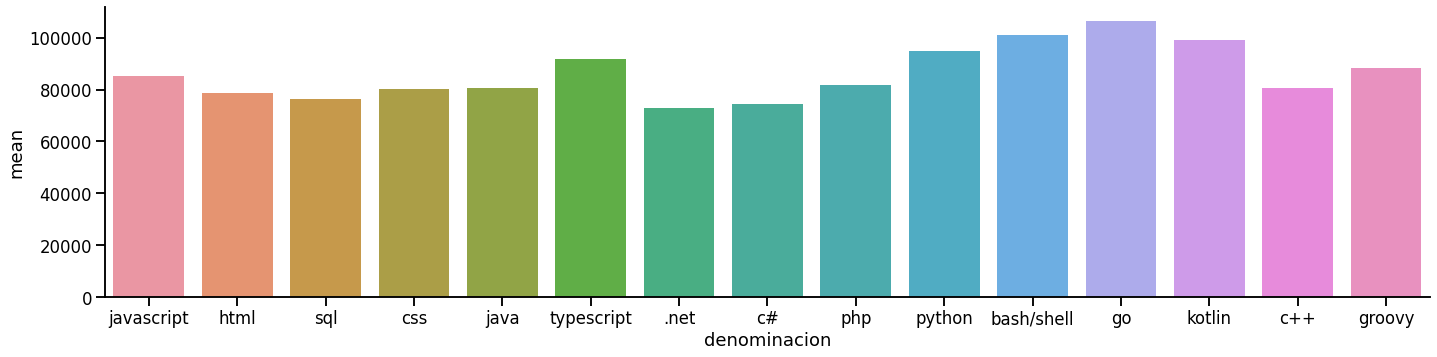

In [42]:
seaborn.catplot(x="denominacion", y="mean", data=cantidad, kind="bar", legend=True,height=5, aspect=4/1, order=lenguajes)

In [43]:
cantidad2 = cantidad.sort_values(by="mean")

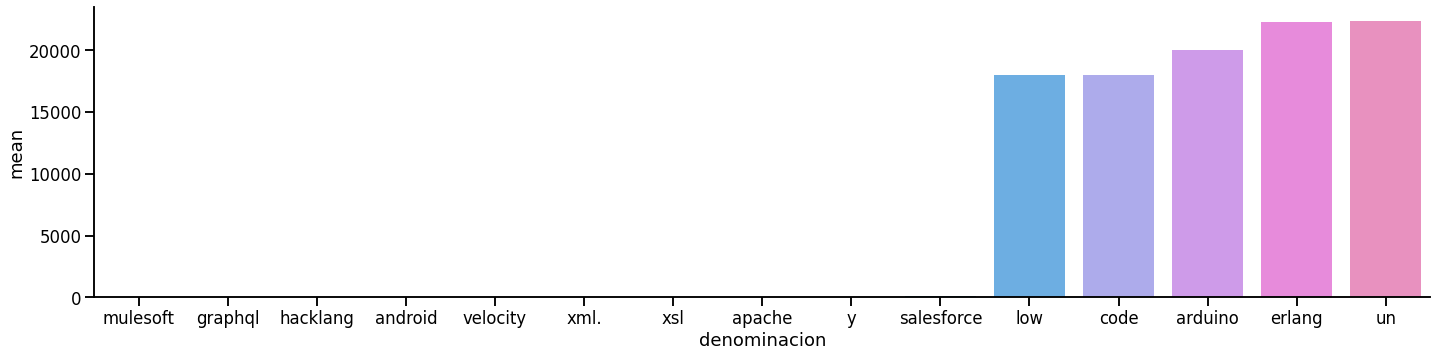

In [44]:
lenguajes2 = cantidad2["denominacion"].head(15)
seaborn.catplot(x="denominacion", y="mean", data=cantidad2, kind="bar", legend=True,height=5, aspect=4/1, order=lenguajes2)

In [45]:
cantidad2.head()

,programming_language,sal_acum,mean,,denominacion
mulesoft,1,0.0,0.0,mulesoft,mulesoft
graphql,1,0.0,0.0,graphql,graphql
hacklang,1,0.0,0.0,hacklang,hacklang
android,1,35.0,35.0,android,android
velocity,1,42.0,42.0,velocity,velocity


In [46]:
cantidad3.head(10)

NameError: name 'cantidad3' is not defined

In [ ]:
lenguajes3 = cantidad3["denominacion"].head(15)
seaborn.catplot(x="denominacion", y="mean", data=cantidad3, kind="bar", legend=True,height=5, aspect=4/1, order=lenguajes3)

#Martin Rodriguez

In [ ]:
#inicialización de variable para Martin R.
df_martin_r=zeros_salary_monthly_NETO.copy()
salary_col='salary_monthly_NETO'

## Tendencia central

In [ ]:
#análisis incial de los datos
df_martin_r[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

In [ ]:
df_martin_r[salary_col].mean(), df_martin_r[salary_col].median()

Siendo que la media y mediana dan muy distintas, y además aún tenemos mínimos muy extraños (13?) evaluo esos extremos. Una media > mediana, indica un sesgo o asimetría hacia la derecha.

In [ ]:
#que son lo valores pequeños que no tienen sentido para un salario?
df[df['salary_monthly_NETO']<1000]

Si analizamos los salarios menores que mil vamos a encontrar que se cargaron con un . indicando la unidad de 1000 y para python es una ','. Procedemos a arreglar esto.**PERO NO SE COMO SE HACE**

In [ ]:
df_salario_correccion_unidad = df[df['salary_monthly_NETO']<1000]
df_salario_correccion_unidad['salary_clean']=df_salario_correccion_unidad['salary_monthly_NETO'].map('{:,.3f}'.format).str.replace(".", "")

In [ ]:
df_salario_correccion_unidad[['salary_monthly_NETO','salary_clean']]

In [ ]:
df['salary_monthly_NETO'][df['salary_monthly_NETO']<1000]

In [ ]:
df['salary_monthly_NETO'][df['salary_monthly_NETO']>1000]

## Análisis usando Histrograma

Me parece que hay que comenzar por analizar los sueldos de manera global, identificar outliers y ver como se distribuye. Ahí ir a los lenguajes y verificar si los valores son lógicos o es un lenguage influenciado por pocos datos quizás u otro tema. 

In [ ]:
#histograma

## Análisis usando Boxplot

In [ ]:
df_martin_r[:3]

Elimación de valores extremos

In [ ]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

In [ ]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

In [ ]:
df_martin_r_under_p90=df_martin_r[df_martin_r[salary_col]<percentile_90].copy()
df_martin_r_under_p90.count()

Seleccion de los lenguajes más relevantes

In [ ]:
#criterio 1: los que más datos tienen
language_count_aux = df_martin_r_under_p90.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
most_important_lang=language_count_aux[:10]
most_important_lang

In [ ]:
#Necesito una manera más alegante de transformar a una serie los most_important_lang
lenguajes_mas_representativos=['javascript','php','html','sql','css','java']
df_with_most_representat_language=df_martin_r_under_p90[df_martin_r_under_p90.programming_language.isin(lenguajes_mas_representativos)].copy()
df_with_most_representat_language.count()

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df_with_most_representat_language, x='salary_monthly_NETO', y='programming_language',color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_lang_work, x='salary_monthly_NETO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')